<a href="https://www.kaggle.com/code/zafarali27/titanic-survival-predictor-random-forest?scriptVersionId=213907252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,MinMaxScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Lode the data in a CSV file

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"train_df Data Shape: {train_df.shape}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(f"{train_df.info()}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(f" checking for null values\n {train_df.isnull().mean()}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(train_df.describe() )

train_df Data Shape: (891, 12)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 checking for null values
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000

# check the null value.

In [6]:
print(f"test_df Data Shape: {test_df.shape}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(f"{test_df.info()}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(f" checking for null values\n {test_df.isnull().mean()}\n")
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")

print(test_df.describe() )

test_df Data Shape: (418, 11)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 checking for null values
 PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.0

In [7]:
# Fill the missing values with the median age
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

# Fill the missing values with the median Fare
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [8]:
# drop the most missing value.
train_df.drop(columns = ["Cabin"],inplace = True)

test_df.drop(columns = ["Cabin"],inplace = True)

In [9]:
# Again Check missing values.

print("Train_df\n ",train_df.isnull().sum())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("Test_df\n",test_df.isnull().sum())

Train_df
  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Test_df
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# EDA

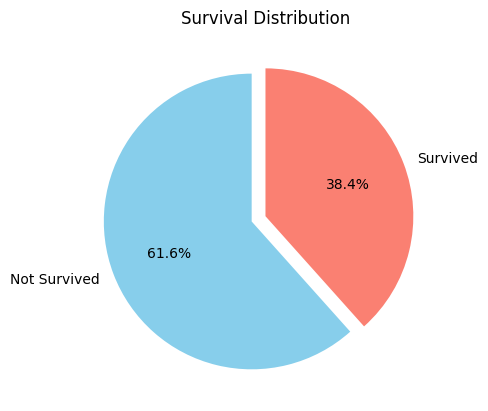

In [10]:
import matplotlib.pyplot as plt

# Plot the pie chart
train_df["Survived"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["skyblue", "salmon"],  # Custom colors
    labels=["Not Survived", "Survived"],  # Custom labels
    startangle=90,  # Rotate the pie chart for better visualization
    explode=(0.1, 0)  # Highlight one segment (optional)
)

# Add title
plt.title("Survival Distribution")


plt.ylabel("")  
plt.show()


In [11]:
train_df["Pclass"].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
mean = train_df.groupby(["Pclass"]) ["Survived"].mean() .reset_index()

In [13]:
mean

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


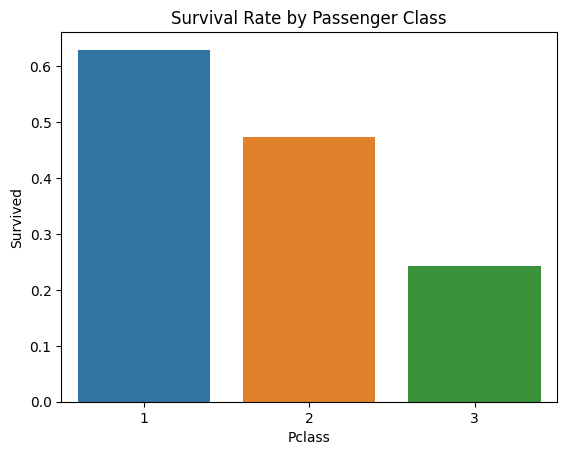

In [14]:

sns.barplot(data = mean, x = "Pclass",y = "Survived")
plt.title("Survival Rate by Passenger Class") 
plt.show()

In [15]:
print(train_df["Sex"].value_counts())
print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
sex_mean= train_df.groupby(["Sex"]) ["Survived"].mean().reset_index() 
sex_mean

Sex
male      577
female    314
Name: count, dtype: int64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>


,Sex,Survived
0,female,0.742038
1,male,0.188908


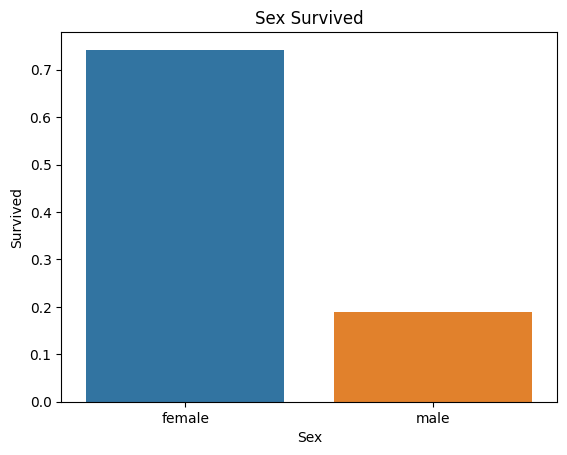

In [16]:
sns.barplot(data=sex_mean, x = "Sex", y="Survived")
plt.title("Sex Survived")
plt.show()

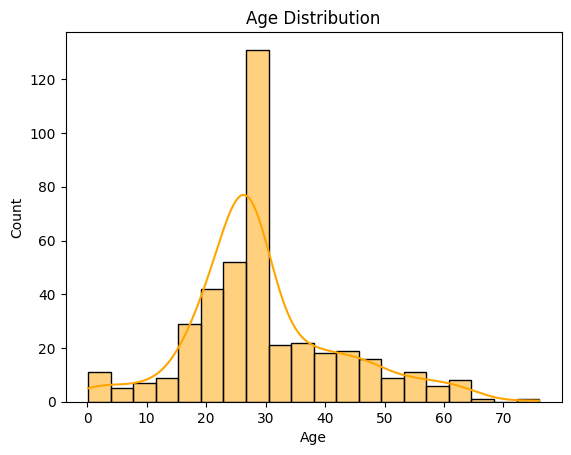

In [17]:
sns.histplot(data= test_df, x = "Age",kde=True,bins=20, color="orange")
plt.title("Age Distribution")
plt.show()

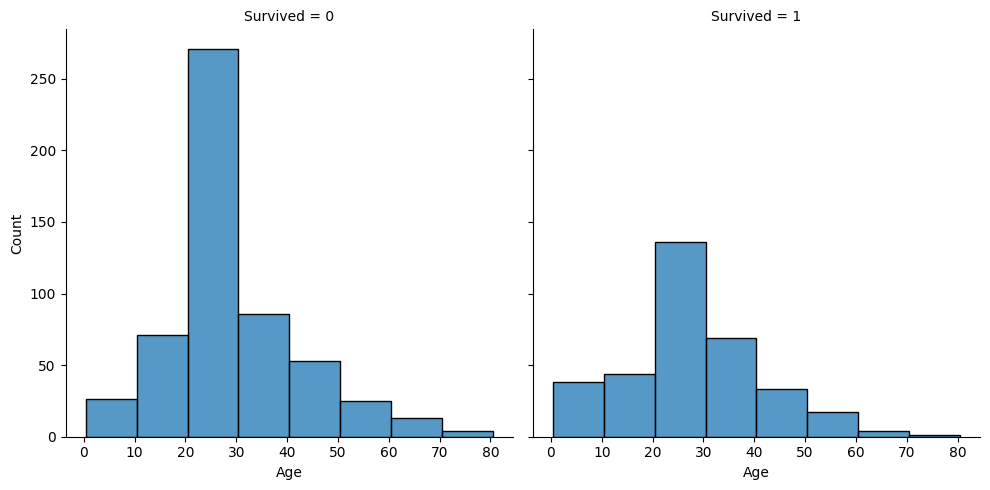

In [18]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
plt.show()

In [19]:
age_survival_sum = train_df.groupby(["Age"])["Survived"].sum().reset_index()
age_survival_sum = age_survival_sum.sort_values(by="Age", ascending=True)
age_survival_sum

,Age,Survived
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1
...,...,...
83,70.00,0
84,70.50,0
85,71.00,0
86,74.00,0


In [20]:
train_df.groupby("SibSp").agg({"Survived": 'mean'}).reset_index()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
train_df.groupby("Parch").agg({"Survived": 'mean'}).reset_index()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [22]:
train_df["family_size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["family_size"] = test_df["SibSp"] + test_df["Parch"] + 1

In [23]:
train_df.groupby("family_size").agg({"Survived": 'mean'}).reset_index()

,family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [24]:
family_map = {1: "ALone" , 2:"small", 3:"small",4:"small",5:"medium",6:"medium",7:"large",8:"large",11:"large"}
train_df["Family_Size_Grouped"] = train_df["family_size"].map(family_map)
test_df["Family_Size_Grouped"] = test_df["family_size"].map(family_map)

In [25]:
train_df.groupby("Family_Size_Grouped").agg({"Survived": 'mean'})

,Survived
Family_Size_Grouped,
ALone,0.303538
large,0.160000
medium,0.162162
small,0.578767


In [26]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [27]:
embarked_mean = train_df.groupby(["Embarked"])["Survived"].mean().reset_index()
embarked_mean

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


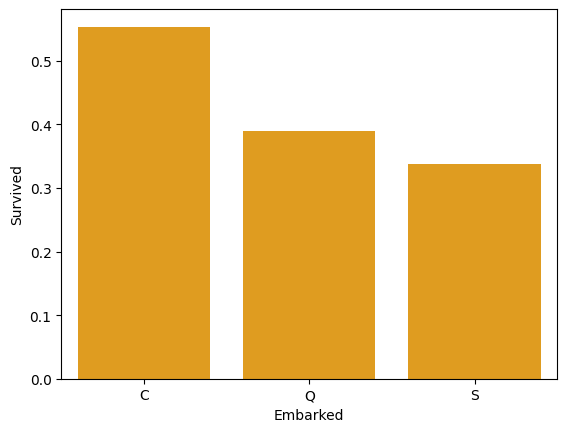

In [28]:
sns.barplot(data=embarked_mean, x = "Embarked", y= "Survived",color="orange")
plt.show()

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Embarked             889 non-null    object 
 11  family_size          891 non-null    int64  
 12  Family_Size_Grouped  891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [30]:
odject_columns_train = train_df.select_dtypes(include="object")
odject_columns_test = test_df.select_dtypes(include="object")

print(odject_columns_train.head())
print(">>>>>>>>>>>>>>>>>>>>>>>>>>")
print(odject_columns_test.head())

                                                Name     Sex  \
0                            Braund, Mr. Owen Harris    male   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2                             Heikkinen, Miss. Laina  female   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4                           Allen, Mr. William Henry    male   

             Ticket Embarked Family_Size_Grouped  
0         A/5 21171        S               small  
1          PC 17599        C               small  
2  STON/O2. 3101282        S               ALone  
3            113803        S               small  
4            373450        S               ALone  
>>>>>>>>>>>>>>>>>>>>>>>>>>
                                           Name     Sex   Ticket Embarked  \
0                              Kelly, Mr. James    male   330911        Q   
1              Wilkes, Mrs. James (Ellen Needs)  female   363272        S   
2                     Myles, Mr. Thomas Francis    

In [31]:
odject_columns_train .columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Family_Size_Grouped'], dtype='object')

# Model Training 

In [32]:
# Define features and target
x = train_df.drop(columns=["Survived", "SibSp", "Parch"], axis=1)
y = train_df["Survived"]

# Train-test split (retain DataFrame format)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

# Custom label encoding function
def label_encode(X):
    return X.apply(lambda col: pd.Series(LabelEncoder().fit_transform(col)) if col.dtype == 'object' else col)

# Preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('label_encoding', FunctionTransformer(label_encode, feature_names_out="one-to-one"), ["Name", "Ticket"]),
    ('one_hot_encoding', OneHotEncoder(sparse_output=False, drop='first'), ["Sex", "Embarked", "Family_Size_Grouped"]),
    ('scaling', MinMaxScaler(), ['Age', 'Fare'])
], remainder="passthrough")  # Keep other columns as is


# Model

random_ = RandomForestClassifier(n_estimators=70, max_depth=4, random_state=43)


# Pipeline
Pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('model', random_)
])

# Fit the pipeline
Pipe.fit(x_train, y_train)

# # Test the pipeline
# score = Pipe.score(x_test, y_test)
# print(f"Model Accuracy: {score}")


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label_encoding',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function label_encode at 0x78e717193760>),
                                                  ['Name', 'Ticket']),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Family_Size_Grouped']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Age', 'Fare'])])),
                ('model',
                 RandomForestClassifier(max_depth=4, n_estimators=70,
                                        random_state=43))])

In [33]:
# Fit and evaluate
Pipe.fit(x_train, y_train)
score = Pipe.score(x_test, y_test)
print(f"Model Accuracy with Random Forest: {score}")

Model Accuracy with Random Forest: 0.8379888268156425


In [34]:
# Fit the pipeline
Pipe.fit(x_train, y_train)

# Make predictions
predictions = Pipe.predict(x_test)

# Create a submission dataframe (if submitting to a competition)
submission = pd.DataFrame({
    'PassengerId': x_test.index,  # Replace with actual ID column
    'Survived': predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file saved successfully!")


Submission file saved successfully!


![logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOBBpHi1LjIJyH5aukpzjk7cXLDkiCwHUYZ1AvC9KDMgRPTxmpenMp0TyByzKEsYGlxY8&usqp=CAU)